<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231024_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


<Axes: xlabel='x', ylabel='y'>

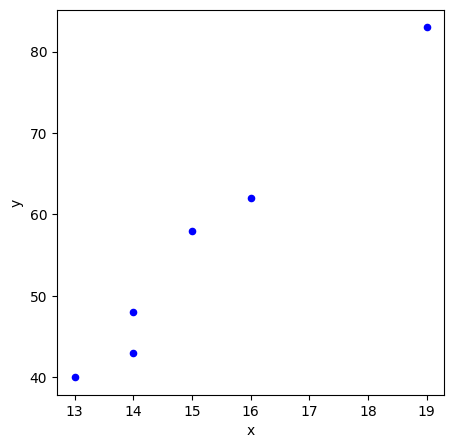

In [ ]:
data.plot(kind="scatter",
          x='x',
          y='y',
          figsize=(5,5),
          color="blue")

In [ ]:
X = pd.DataFrame(data['x'])
lr = linear_model.LinearRegression()
lr.fit(X, data.y)

LinearRegression()

In [ ]:
lr.coef_

array([7.32846715])

In [ ]:
lr.intercept_

-55.48175182481753

In [ ]:
prediction=lr.predict(X)

In [ ]:
prediction

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

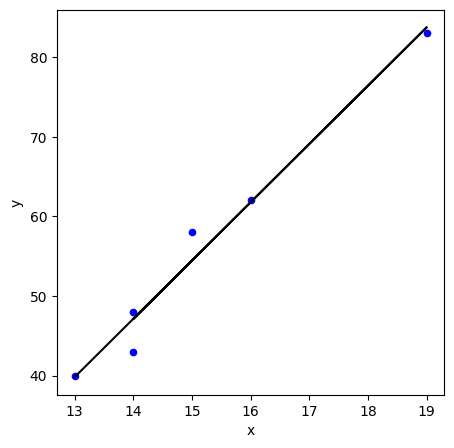

In [ ]:
data.plot(kind="scatter",
          x='x',
          y='y',
          figsize=(5,5),
          color="blue")
plt.plot(data.x, prediction, color='black')

In [ ]:
np.sum((data.y-prediction)**2)/6

5.172749391727503

total sum of squares ( TSS ) = explained sum of squares (ESS)+ residual sum of squares (RSS).


$$ \\ \sum (y_i - \bar y)^2 = \sum (\hat y_i - \bar y)^2 + \sum (y_i - \hat y)^2 \\ \\
 TSS = ESS + RSS \\ \\ \\
 R^2 = {ESS \over TSS} = 1 - {RSS \over TSS} \\ \\ $$

MAE (Mean Absolute Error) : 자료의 특성을 직관적으로 파악하게 한다. 예> 신발가격은 10만원에서 앞뒤로 +- 2만원까지 가능

$$ MAE = {1 \over n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

MSE (Mean Squared Error) : 실제값과 예측값의 차이를 제곱해 평균한 것

$$ MSE = {1 \over n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

RMSE (Root Mean Squared Error)

$$RMSE = \sqrt{MSE} = \sqrt {{1 \over n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} = {1 \over \sqrt{n}} \sqrt{\sum_{i=1}^n (y_i - \hat{y}_i)^2}  $$

 MAE가 자료의 직관적인 특성을 말해주는 반면, RMSE 자료에 이상치가 포함된 경우 MAE 보다 RMSE가 변동 폭이 작다.  

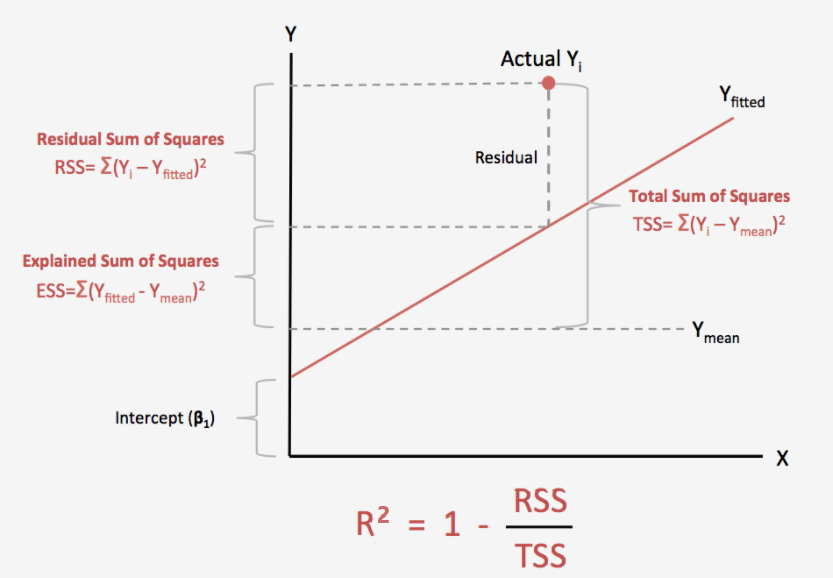

In [ ]:
residuals = data['y']-prediction

In [ ]:
residuals

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

In [ ]:
type(residuals)

pandas.core.series.Series

In [ ]:
RSS = (residuals**2).sum()

In [ ]:
RSS

31.03649635036502

In [ ]:
MSE = RSS/6

In [ ]:
MSE

5.172749391727503

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

2.2743679103714736

In [ ]:
TSS = ((data.y - data.y.mean())**2).sum()

In [ ]:
TSS

1257.3333333333333

In [ ]:
R_squared = 1 - (RSS/TSS)

In [ ]:
R_squared

0.9753156179610034

In [ ]:
lr.score(X=X, y=data.y)

0.9753156179610034

#경사하강법

RSS 를 최소화 하는 회귀 계수를 수치해석적으로 구하자

잔차 = 실제값 - 예측값

$$y_i - \hat{y_i}$$

$$\hat{y_i} = w_0 + w_1 \times x_i$$

$$
RSS = {1 \over N}\sum_{i=1}^N (y_i - (w_0 + w_1 \times x_i))^2
$$

비용함수 또는 손실함수라 한다. <파이썬 머신러닝 완벽가이드, 권철민, 위키북스, 2020>

x 와 y는 주어져 있다.

$w_0$ 와 $w_1$ 가 미지수 이다.

RSS(w) 인 w의 2차 함수이다.

미분하여 최소점을 찾아간다.

## $$ {{\partial RSS} \over {\partial w_1} } = {2 \over N} \sum_{i=1}^N (-x_i) (y_i - (w_0 + w_1 \times x_i))  $$

## $$ {{\partial RSS} \over {\partial w_0} } = {2 \over N} \sum_{i=1}^N (-1) (y_i - (w_0 + w_1 \times x_i))  $$

$\partial$ : 라운드,  편미분 기호



## $$ 새로운 \ w_1 = 이전 \ w_1 - {{\partial RSS} \over {\partial w_1} }$$

## $$ 새로운 \ w_0 = 이전 \ w_0 - {{\partial RSS} \over {\partial w_0} }$$

##f(x), x -> $x_{new}$

$$D_{\vec{v}}f(x)$$

$$\vec{ \bigtriangledown }f(x)$$

학습률 $$ \eta \quad (0 ~ 1.0 \quad 사이의 수)$$


1. w0, w1을 임의의 값으로 설정하고 첫 비용함수(=RSS)의 값을 계산 한다.

2. 새로운 w0 와 w1을 계산하고 다시 비용함수를 계산 한다. $$ w_1 = w_1 + \eta {2 \over N} \sum_{i=1}^N (x_i) (실제값 - 예측값) $$

$$ w_0 = w_0 + \eta {2 \over N} \sum_{i=1}^N (실제값 - 예측값) $$

3. 비용함수가 감소하면 2번 과정을 반복한다. 비용함수가 더 이상 감소하지 않으면 반복을 중지 한다.

In [ ]:
x = np.arange(-3,3, 0.1)

In [ ]:
y = x*x

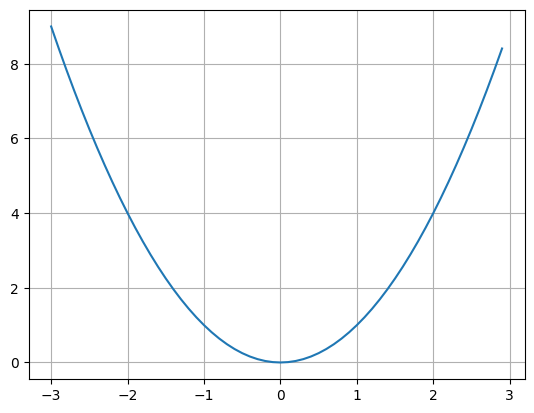

In [ ]:
plt.plot(x, y)
plt.grid()

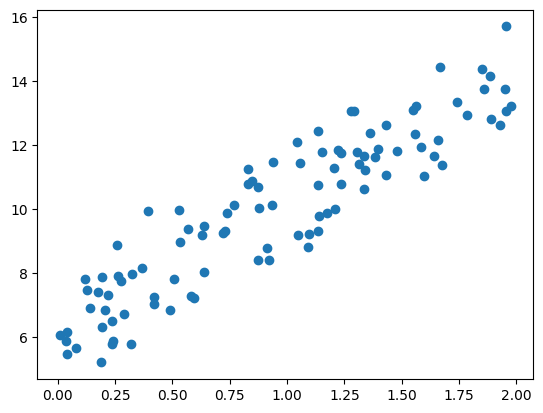

In [ ]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)
plt.scatter(X, y)

In [ ]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N # RSS
    return(cost)

In [ ]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1.T) + w0

    diff = y-y_pred

    w0_factors = np.ones((N, 1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [ ]:
def gradient_descent_steps(X, y, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [ ]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)

In [ ]:
w1, w0

(array([[4.02181364]]), array([[6.16203122]]))

In [ ]:
w1[0, 0]

4.021813642697164

In [ ]:
X.shape

(100, 1)

In [ ]:
w0.shape

(1, 1)

In [ ]:
y_pred = w1[0, 0]*X + w0

In [ ]:
get_cost(y, y_pred)

0.9934784315632568

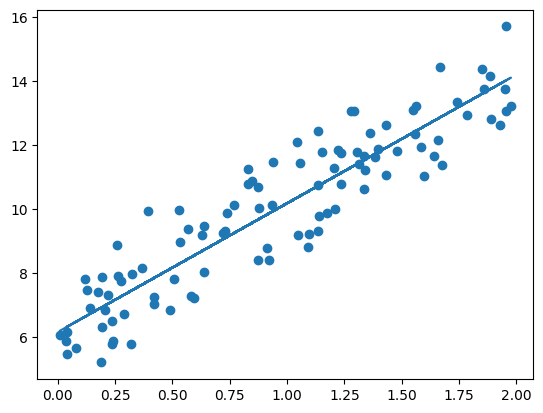

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

확률적 경사 하강기법

In [ ]:
X.shape[0]

100

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000)

In [ ]:
w1, w0

(array([[4.00668731]]), array([[6.13725891]]))

In [ ]:
y_pred = w1[0, 0]* X + w0

In [ ]:
get_cost(y, y_pred)

0.9953010643933876

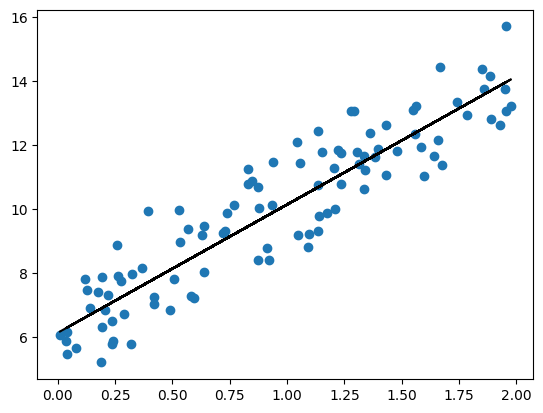

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'k')

예제

In [ ]:
from sklearn.datasets import load_boston

ImportError: ignored

In [ ]:
ls ./drive/MyDrive/data/bost*

./drive/MyDrive/data/boston_house.csv


In [ ]:
!head ./drive/MyDrive/data/boston_house.csv

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [ ]:
df = pd.read_csv('./drive/MyDrive/data/boston_house.csv')

In [ ]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: xlabel='RM', ylabel='PRICE'>

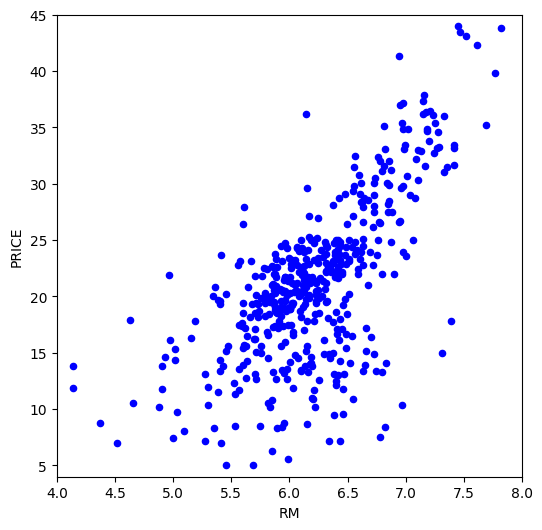

In [ ]:
df.plot(kind='scatter', x='RM', y='PRICE', figsize=(6,6), color='blue', xlim=(4,8), ylim=(4,45) )

In [ ]:
X=pd.DataFrame(df['RM'])
y = df['PRICE']

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
prediction = lr.predict(X)
print('a value : ', lr.coef_)
print('b value : ', lr.intercept_)

a value :  [9.10210898]
b value :  -34.67062077643857


In [ ]:
residuals = df.PRICE - prediction
residuals.describe()

count    5.060000e+02
mean     2.134437e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: PRICE, dtype: float64

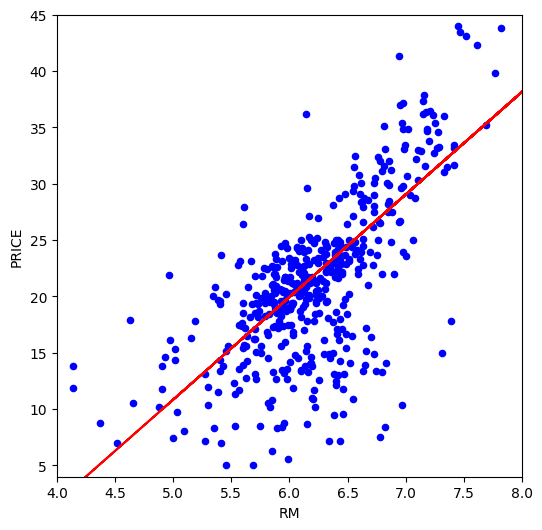

In [ ]:
df.plot(kind='scatter', x='RM', y='PRICE', figsize=(6,6),
        color='blue', xlim=(4,8), ylim=(4,45))
plt.plot(df.RM, prediction, color='red')

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
MSE(y, prediction)

43.60055177116956

In [ ]:
(MSE(y, prediction))**0.5 # = RMSE

6.603071389222561

In [ ]:
lr.score(X, y) # R2 Score

0.48352545599133423

In [ ]:
import seaborn as sns

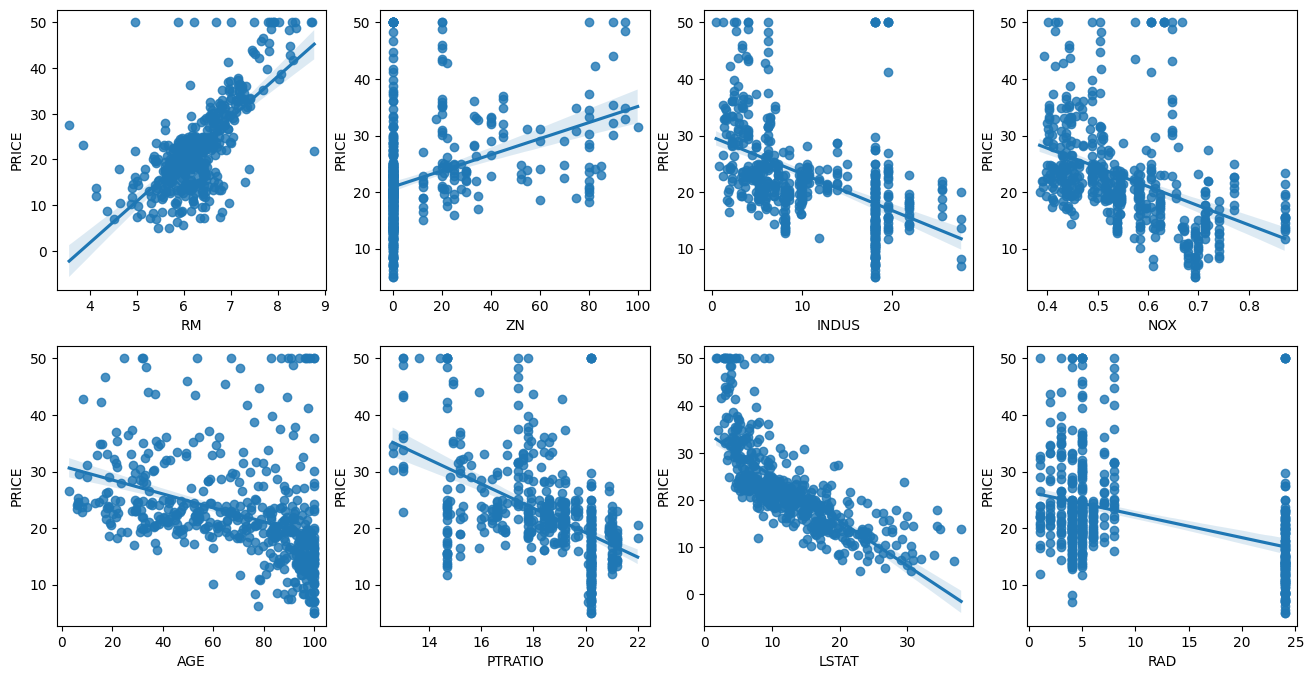

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X_data = df.iloc[:, :-1]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=156)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mses = MSE(y_test, y_pred)
rmse = mses**0.5
print(mses, rmse)
r2_score(y_test, y_pred)

18.140266604383026 4.259139185842959


0.7854511954574214

In [ ]:
lr.intercept_

39.29051011945259

In [ ]:
lr.coef_

array([-1.26922243e-01,  6.41812066e-02,  3.92889954e-02,  2.75649142e+00,
       -2.00898224e+01,  3.44900195e+00,  5.95889045e-03, -1.64557096e+00,
        3.28500267e-01, -1.31602465e-02, -8.84454934e-01,  9.24218918e-03,
       -5.44123065e-01])

In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)

In [ ]:
coeff

CRIM       -0.1
ZN          0.1
INDUS       0.0
CHAS        2.8
NOX       -20.1
RM          3.4
AGE         0.0
DIS        -1.6
RAD         0.3
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.5
dtype: float64

In [ ]:
coeff.sort_values(ascending=False)

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
y_target = df.PRICE
X_data = df.iloc[:, :-1]
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse = (-1*neg_mse_scores)**0.5
avg_rmse = np.mean(rmse)

In [ ]:
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [ ]:
rmse

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [ ]:
avg_rmse

5.828658946215802

단일 회귀 :    

$$
w_0 + w_1 \times x_1
$$

다중 회귀:

$$
w_0 + w_1 \times x_1 + w_2 \times x_2 + \cdots + w_n \times x_n
$$

다항 회귀:

$$
w_0 + w_1 \times x_1 + w_2 \times x_2^2 + \cdots + w_n \times x_n^n
$$

사이킷런에서는 다항 회귀를 위한 클래스를 제공하지 않는다.

##sklearn으로 다항 회귀 구하는 법

데이터

[X1, X2]

데이터 변환

[1, x1, x2, x1x1, x1x2, x2x2]

[1, x1, x2, x1x1, x1x2, x2x2] 에 대해 LinearRegression() 적용

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = np.arange(4).reshape(2, 2)

In [ ]:
X

array([[0, 1],
       [2, 3]])

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

In [ ]:
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

삼차 다항 회귀 예제

In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

In [ ]:
X = np.arange(0,4).reshape(2,2)

In [ ]:
X

array([[0, 1],
       [2, 3]])

In [ ]:
y = polynomial_func(X)

In [ ]:
y

array([  5, 125])

In [ ]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)

In [ ]:
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [ ]:
poly = PolynomialFeatures(3)
poly.fit(X)

PolynomialFeatures(degree=3)

In [ ]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1',
       'x0 x1^2', 'x1^3'], dtype=object)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(poly_ftr, y)

LinearRegression()

In [ ]:
np.round(model.coef_,2)

array([0.  , 0.18, 0.18, 0.36, 0.54, 0.72, 0.72, 1.08, 1.62, 2.34])

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1',
       'x0 x1^2', 'x1^3']

In [ ]:
model.coef_.shape

(10,)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

In [ ]:
X

array([[0, 1],
       [2, 3]])

In [ ]:
y

array([  5, 125])

In [ ]:
model.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [ ]:
model.named_steps

{'poly': PolynomialFeatures(degree=3), 'linear': LinearRegression()}

In [ ]:
np.round(model.named_steps['linear'].coef_,2)

array([0.  , 0.18, 0.18, 0.36, 0.54, 0.72, 0.72, 1.08, 1.62, 2.34])

# 과대적합 예제

다항회귀를 이용하여 과대적합을 알아보자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

 코사인 함수의 y 값에 노이즈를 주어 샘플데이터 만들기


In [ ]:
def true_func(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

In [ ]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [ ]:
X.shape

(30,)

In [ ]:
y = true_func(X) + np.random.randn(n_samples)*0.1

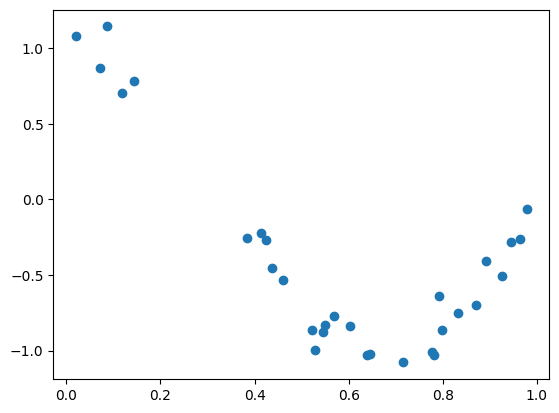

In [ ]:
plt.scatter(X, y)

In [ ]:
X_test = np.linspace(0, 1, 100)
y_test = true_func(X_test)

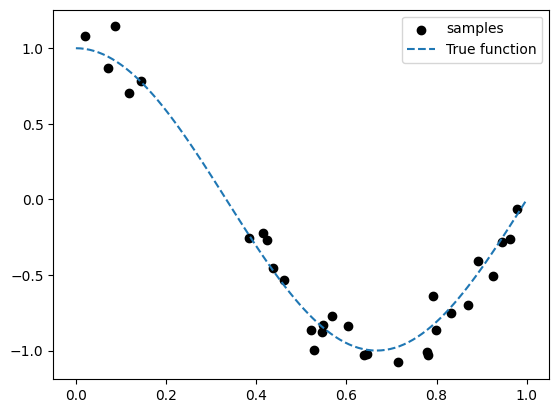

In [ ]:
plt.scatter(X, y, c='k', label='samples')
plt.plot(X_test, y_test, '--', label='True function')
plt.legend()

다항 회귀 구하기 : 차수를 1, 4, 15 차

In [ ]:
X.shape

(30,)

In [ ]:
degrees = [1, 4, 15]

In [ ]:
result = {}
for i in degrees:
    pipe = Pipeline([('polynomial_features', PolynomialFeatures(degree=i, include_bias=False)),
                     ('linear_regression', LinearRegression())])
    scores = cross_val_score(pipe, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    pipe.fit(X.reshape(-1, 1), y)
    result[i] = (pipe, -scores.mean(), scores.std())

In [ ]:
result

{1: (Pipeline(steps=[('polynomial_features',
                   PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear_regression', LinearRegression())]),
  0.4077289625098685,
  0.4254685884064717),
 4: (Pipeline(steps=[('polynomial_features',
                   PolynomialFeatures(degree=4, include_bias=False)),
                  ('linear_regression', LinearRegression())]),
  0.04320874987232064,
  0.07077938529772179),
 15: (Pipeline(steps=[('polynomial_features',
                   PolynomialFeatures(degree=15, include_bias=False)),
                  ('linear_regression', LinearRegression())]),
  181238256.56423894,
  543702354.2232267)}

1e-2 = 0.01

In [ ]:
for i in result:
    w = result[i][0].named_steps['linear_regression'].coef_
    mses = result[i][1]
    print(f' degree={i} 의 MSE : {mses:.2e}')
    print(f' degree={i} 의 회귀 계수 : \n {w}')
    print('=='*50)

 degree=1 의 MSE : 4.08e-01
 degree=1 의 회귀 계수 : 
 [-1.60931179]
 degree=4 의 MSE : 4.32e-02
 degree=4 의 회귀 계수 : 
 [  0.46754142 -17.78954475  23.5926603   -7.26289872]
 degree=15 의 MSE : 1.81e+08
 degree=15 의 회귀 계수 : 
 [-2.98293082e+03  1.03899393e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]


In [ ]:
X_test.shape

(100,)

In [ ]:
for i in result:
    pipelines = result[i][0]
    pred = pipelines.predict(X_test[:, np.newaxis])
    print(pred)

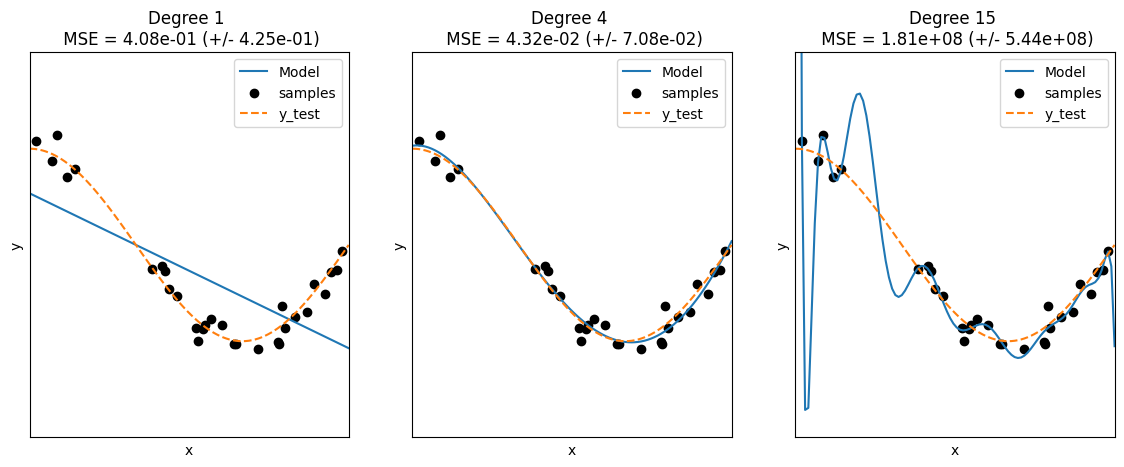

In [ ]:
plt.figure(figsize = (14, 5))
j=0
for i in result:
    pipelines = result[i][0]
    mean_score = result[i][1]
    std_score = result[i][2]
    pred = pipelines.predict(X_test[:, np.newaxis])
    j+=1
    ax = plt.subplot(1, len(degrees), j)
    plt.plot(X_test, pred, label='Model')
    plt.scatter(X, y, c='k', label='samples')
    plt.plot(X_test, y_test, '--', label='y_test')
    plt.xlim((0, 1))
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.title(f'Degree {i} \n MSE = {mean_score:.2e} (+/- {std_score:.2e})')
    plt.setp(ax, xticks=(), yticks=())